In [1]:
import numpy as np
from scipy.stats import bernoulli

In [2]:
from sklearn.datasets import load_digits
import pandas as pd
digits, Target = load_digits(return_X_y = True)
digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
mnist = pd.read_csv("C:/Users/amade/Downloads/archive(22)/mnist_train.csv")
mnist.shape

(60000, 785)

In [4]:
mnist

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
numbers = mnist['label']

In [6]:
mnist.drop(['label'], axis = 1)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist.sum(axis = 1)

0        27530
1        31095
2        19447
3        17136
4        23223
         ...  
59995    25810
59996    27288
59997    22137
59998    20434
59999    20928
Length: 60000, dtype: int64

In [8]:
mnist.max().max()

255

In [9]:
mnist.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [10]:
mnist2 = (mnist/128).astype('int')

In [11]:
mnist2.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000700,0.000283,0.000200,0.000067,0.000050,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.026448,0.016830,0.014141,0.008165,0.007071,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0


In [41]:
mnist2.drop('label', axis = 1, inplace= True)

In [42]:
mnist2

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data1 = pd.DataFrame(digits)
mnist3 = (data1/9).astype('int')

In [13]:
mnist3.head()
print(f'shape: {mnist3.shape}')

shape: (1797, 64)


In [14]:
mnist3.sum(axis = 1)

0       17
1       19
2       21
3       16
4       14
        ..
1792    18
1793    22
1794    23
1795    18
1796    22
Length: 1797, dtype: int64

In [15]:
def init1(data, n_clusters):
    
    seed = 42
    high = data.max()
    low = data.min()
    rng = np.random.default_rng(seed)
   

    
    random_indices = np.random.randint(0, data.shape[0], n_clusters)
    mu = data.to_numpy()[random_indices,:]#center of distribution
    sigma = [np.cov(data.T) for _ in range(n_clusters)]#covariance matrix
    pi = np.full(shape=n_clusters, fill_value=1/n_clusters)
    
    return np.array(mu), sigma,np.array(pi)

In [16]:
init1(mnist3, 5)

(array([[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
         0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
         0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
         0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
         1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
         0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
         1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [17]:
def init2(data, n_clusters):
    
    seed = 42
    epsilon = 0.1
   
    rng = np.random.default_rng(seed)
    
    
    
    mu = [rng.uniform(low = epsilon, high = 1 - epsilon, size = data.shape[1]) for _ in range(n_clusters)]
    
    
    sigma = [np.cov(data.T) for _ in range(n_clusters)]#covariance matrix
    pi = np.full(shape=n_clusters, fill_value=1/n_clusters)
    
    return np.array(mu), np.array(sigma),np.array(pi)

In [18]:
init2(mnist3, 5)

(array([[0.71916484, 0.45110275, 0.78687834, 0.65789442, 0.17534188,
         0.88049788, 0.70891176, 0.72885144, 0.20249091, 0.46030875,
         0.39663842, 0.84141199, 0.6150921 , 0.75820929, 0.45473136,
         0.28179098, 0.54366783, 0.1510538 , 0.76210494, 0.60533152,
         0.70647019, 0.38362077, 0.87655842, 0.8144969 , 0.7227068 ,
         0.25571097, 0.4733768 , 0.13504301, 0.22343159, 0.64643916,
         0.69580972, 0.87400779, 0.36066029, 0.39636776, 0.47564465,
         0.25157709, 0.2039372 , 0.48056394, 0.28152748, 0.6358512 ,
         0.44972154, 0.76614256, 0.66021208, 0.34989331, 0.76580784,
         0.74381149, 0.4099827 , 0.33066248, 0.6459964 , 0.21180199,
         0.25992656, 0.10588982, 0.7295395 , 0.63188069, 0.6641323 ,
         0.72458322, 0.46713262, 0.55499296, 0.2118376 , 0.19162406,
         0.63472237, 0.47687696, 0.55218889, 0.71199909],
        [0.60777466, 0.54286352, 0.54736573, 0.34316008, 0.12465427,
         0.44937391, 0.27166774, 0.42682291, 

In [19]:
def init3(data, n_clusters):
    
    seed = 42
    high = data.max()
    low = data.min()
    rng = np.random.default_rng(seed)
    alpha = 0.75
    

    mu_rand, _, _ = init1(data, n_clusters)
    mu_p, _, _ = init2(data, n_clusters)

    
    mu = alpha*mu_rand + (1 -alpha)*mu_p
    sigma = [np.cov(data.T) for _ in range(n_clusters)]#covariance matrix
    pi = np.full(shape=n_clusters, fill_value=1/n_clusters)
    #pi, weights of each component
    #responsibility = np.full(shape = data.shape, fill_value = 1/n_clusters)
    return np.array(mu), np.array(sigma),np.array(pi)

In [20]:
init3(mnist3, 5)

(array([[0.17979121, 0.11277569, 0.19671958, 0.91447361, 0.79383547,
         0.22012447, 0.17722794, 0.18221286, 0.05062273, 0.11507719,
         0.8491596 , 0.960353  , 0.90377302, 0.93955232, 0.11368284,
         0.07044774, 0.13591696, 0.03776345, 0.94052623, 0.15133288,
         0.17661755, 0.84590519, 0.2191396 , 0.20362422, 0.1806767 ,
         0.06392774, 0.8683442 , 0.03376075, 0.0558579 , 0.91160979,
         0.17395243, 0.21850195, 0.09016507, 0.09909194, 0.86891116,
         0.06289427, 0.0509843 , 0.87014099, 0.07038187, 0.1589628 ,
         0.11243038, 0.19153564, 0.91505302, 0.08747333, 0.19145196,
         0.93595287, 0.10249568, 0.08266562, 0.1614991 , 0.0529505 ,
         0.81498164, 0.77647245, 0.18238488, 0.90797017, 0.16603308,
         0.18114581, 0.11678316, 0.13874824, 0.0529594 , 0.79790601,
         0.90868059, 0.11921924, 0.13804722, 0.17799977],
        [0.15194366, 0.13571588, 0.13684143, 0.83579002, 0.78116357,
         0.86234348, 0.06791693, 0.10670573, 

In [21]:
def prob(x,mu_k):
    L = []
    for i in range(len(x)):
        L.append((mu_k[i]**x[i])*((1 - mu_k[i])**(1 - x[i])))
    return np.prod(np.array(L))


In [22]:
def e_step(n_comp, prototypes, data, pi):
    R_matrix = np.zeros((data.shape[0], n_comp))
    for k in range(n_comp):
        mu_k = prototypes[k]
        R_matrix[:,k] = np.array([prob(data.iloc[i], mu_k) for i in range(len(data))])
    numerator = R_matrix*pi
    
    denominator = numerator.sum(axis = 1)[:, np.newaxis] 
    denominator = denominator 
    

    responsibility = numerator/denominator
    return responsibility    
        
        


In [23]:
def m_step(data,prototypes,sigma, pi, n_comp, responsibility):
    cov = np.zeros_like(sigma)

    for i in range(n_comp):
        mu_k = prototypes[i]
        weight = responsibility[:, [i]]
        total_weight = weight.sum()
        prototypes[i] = ((data * weight) ).sum(axis=0) / total_weight
        
       
        cov[i] = np.diagflat(np.array([mu_k[n]*(1- mu_k[n]) for n in range(data.shape[1])]))
        pi[i] = responsibility[:,i].sum()/len(data)
    return np.array(prototypes), np.array(pi), np.array(cov)

In [24]:
np.diagflat(np.array([1,2,3]), k=0)

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [25]:
def log_likelihood(data, n_comp, pi, prototypes, responsibility):
    eps = 1e-8

    likelihood_loss = []
    for k in range(n_comp):
        probabilities = np.array([prob(data.iloc[i], prototypes[k]) for i in range(len(data))])
        likelihood = pi[k] * probabilities
        inner = (responsibility[:,k] * np.log(likelihood +eps)).sum()
        likelihood_loss.append(inner.sum())
    return np.sum(np.array(likelihood_loss))

In [26]:
def bmm(data, max_iter, n_comp):
    import matplotlib.pyplot as plt
    iter = 0
    prototypes, sigma, pi= init2(data, n_comp)
    l = []
    while iter < max_iter:
        responsibility = e_step(n_comp, prototypes, data, pi)
        prototypes, pi, sigma = m_step(data,prototypes,sigma, pi, n_comp, responsibility)
        loss = log_likelihood(data, n_comp, pi, prototypes, responsibility)
        l.append(loss)
        
        iter += 1
        print(f'loss: {loss}')
        plt.plot(l)
        plt.xlabel('Number of Iterations')
        plt.ylabel('log_likelihood')
        plt.title('loss plot')
    return pi, np.argmax(np.array(responsibility), axis = 1), prototypes

In [59]:
def pick_digit_(array):
    num = np.array([digits[i] for i in range(len(digits)) if Target[i] in array])
    return num

In [31]:
def pick_digit(array):
    num = np.array([mnist2.iloc[i] for i in range(len(mnist2)) if numbers.iloc[i] in array])
    return num

In [43]:
mnist5 = pick_digit([2,3,5])

In [44]:
mnist6 = pd.DataFrame(mnist5)

In [45]:
mnist2

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
mnist6

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


loss: -322546.11982660595
loss: -322546.1198266059
loss: -322546.119826606
loss: -322546.1198266059
loss: -322546.119826606


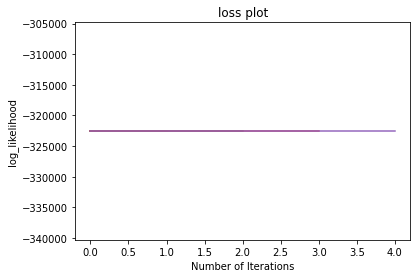

In [47]:
weights, labels, prototype = bmm(mnist6, 5,3)

loss: -32940.42543739568
loss: -32585.962869443014
loss: -31814.78643184929
loss: -31306.30672942821
loss: -31111.291473658246
loss: -30998.171043632025
loss: -30920.402255103952
loss: -30858.096752527603
loss: -30813.115343983063
loss: -30799.55667608355


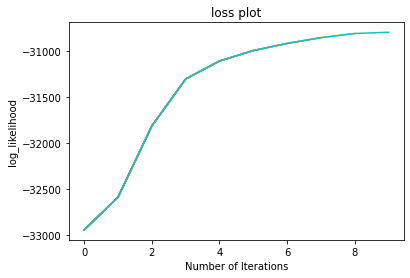

In [55]:
weights1, labels1, prototype1 = bmm(mnist3, 10,10)

In [49]:
def show(image):
    import matplotlib.pyplot as plt
    '''
    Function to plot the MNIST data
    '''
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=plt.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    plt.show()


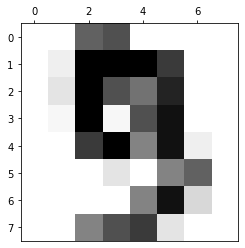

In [50]:
show(np.array(data1.iloc[9]).reshape((8,8)))

In [51]:
special = pd.DataFrame(pick_digit([2,3,9]))

In [52]:
special

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
mnist4 = (special/9).astype('int')

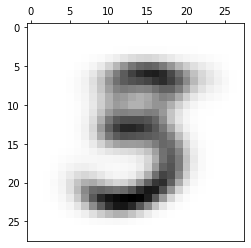

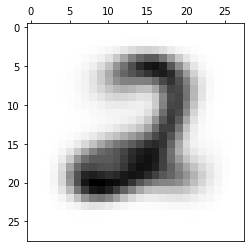

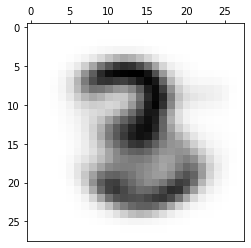

[None, None, None]

In [54]:
[show(prototype[i].reshape(28,28)) for i in range(len(prototype))]

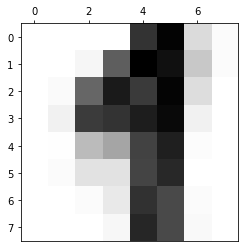

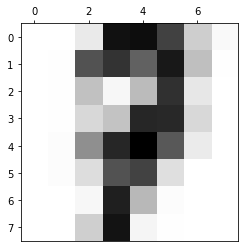

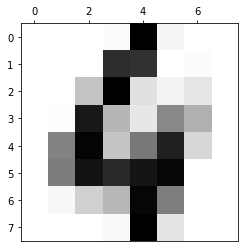

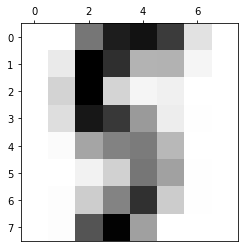

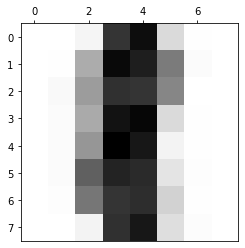

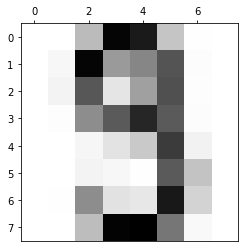

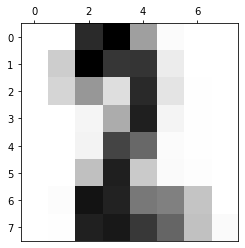

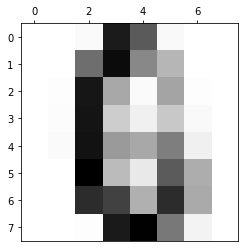

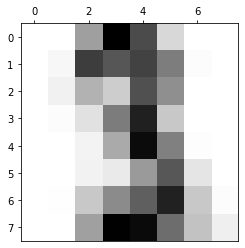

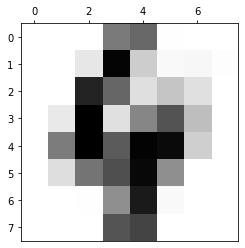

[None, None, None, None, None, None, None, None, None, None]

In [56]:
[show(prototype1[i].reshape(8,8)) for i in range(len(prototype1))]